## Linear regression assumptions

In this notebook, we will review the assumptions underlying our analysis of [linear regression](https://nbviewer.jupyter.org/github/siavashaslanbeigi/stats_notes/blob/master/multi_linreg.ipynb), and what happens when those assumptions are invalid. What we've covered so far goes under the umbrella of Ordinary Least Squares (OLS).

### Prerequisites
* [Simple linear regression](https://nbviewer.jupyter.org/github/siavashaslanbeigi/stats_notes/blob/master/linreg.ipynb)
* [Multiple linear regression](https://nbviewer.jupyter.org/github/siavashaslanbeigi/stats_notes/blob/master/multi_linreg.ipynb)

## Non-normal noise

### BLUE

We derived the OLS estimates $\hat{\beta}_j$ in two ways: (i) minimizing a cost function which is constructed from the sum of squared prediction errors, and (ii) maximizing the probability of observing the data set under the following assumptions: $y^{(i)}$ are normally distributed as $\mathcal{N}(\beta^T{x^{(i)}}, \sigma^2)$ and independent for all $i \neq j$.

In the first method, we never spoke of the normal distribution, but came up with the cost function heuristically. In the second method, we did assume errors are normally distributed. So what's the deal? Are the OLS estimates $\hat{\beta}_j$ only valid if the residuals are normally distributed? To answer this question, consider the following model:

\begin{equation}
y^{(i)} = \beta^Tx^{(i)} + \epsilon^{(i)},
\end{equation}

where $\epsilon^{(1)}, \dots, \epsilon^{(m)}$ are *any* random variables satisfying:

\begin{equation}
\langle \epsilon^{(i)} \rangle = 0, \qquad
\langle \epsilon^{(i)}\epsilon^{(j)} \rangle = \sigma^2\delta_{ij}.
\end{equation}

Given that $\epsilon^{(i)}$ could be non-normal, are the OLS estimates still unbiased? Recall that the OLS esimtaes $\hat{\beta}$ are given by

\begin{equation}
\hat{\beta}=(X^TX)^{-1}X^T Y.
\end{equation}

Let's compute the expectation value of $\hat{\beta}$

\begin{equation}
\langle \hat{\beta} \rangle
    = (X^TX)^{-1}X^T \langle Y \rangle
    = (X^TX)^{-1}X^T (X\beta + \langle \epsilon \rangle)
    = (X^TX)^{-1}X^TX\beta
    = \beta,
\end{equation}

where we've introduced the vectors

\begin{equation}
\langle Y \rangle
    \equiv
    \begin{pmatrix}
        \langle y^{(1)} \rangle \\
        \langle y^{(2)} \rangle \\
        \vdots \\
        \langle y^{(m)} \rangle
    \end{pmatrix} =
    \begin{pmatrix}
        \beta^Tx^{(1)} \\
        \beta^Tx^{(2)} \\
        \vdots \\
        \beta^Tx^{(m)}
    \end{pmatrix}
    = X\beta, \qquad
\langle \epsilon \rangle
    \equiv
    \begin{pmatrix}
        \langle \epsilon^{(1)} \rangle \\
        \langle \epsilon^{(2)} \rangle \\
        \vdots \\
        \langle \epsilon^{(m)} \rangle
    \end{pmatrix} =
    \begin{pmatrix}
        0 \\
        0 \\
        \vdots \\
        0
    \end{pmatrix}
    = 0
\end{equation}

Nice! All we need for $\hat{\beta}$ to be unbiased is $\langle \epsilon \rangle = 0$.

What about the variance of $\hat{\beta}$? Could it be that there is some other linear estimator that is unbiased but has lower variance? Consider some other linear estimator $\tilde{\beta}$. It needs to be linear in $Y$, so we can express it as

\begin{equation}
\tilde{\beta} = CY, \qquad
C \equiv [(X^TX)^{-1}X^T + D],
\end{equation}

where $D$ is any (for now) $(n+1)\times m$ dimensional matrix. We want $\tilde{\beta}$ to be unbiased:

\begin{equation}
\langle \tilde{\beta} \rangle
    = [(X^TX)^{-1}X^T + D] \langle Y \rangle
    = [(X^TX)^{-1}X^T + D] X\beta
    = [I_{n+1} + DX]\beta,
\end{equation}

so we must have that

\begin{equation}
DX = 0.
\end{equation}

Let's compute the variance of $\tilde{\beta}_j$:

\begin{align*}
Var(\tilde{\beta}_j)
    &= \left\langle \left(\tilde{\beta}_j - \langle \tilde{\beta}_j \rangle\right)^2 \right\rangle \\
    &= \sum_{i,i'=1}^{m}C_{ji}C_{ji'}\left\langle(y^{(i)} - \langle y^{(i)} \rangle)(y^{(i')} - \langle y^{(i')} \rangle)\right\rangle \\
    &= \sum_{i,i'=1}^{m}C_{ji}C_{ji'}\langle \epsilon^{(i)}\epsilon^{(i')} \rangle \\
    &= \sum_{i,i'=1}^{m}C_{ji}C_{ji'}\sigma^2\delta_{ii'} \\
    &= \sigma^2\sum_{i=1}^{m}C_{ji}C_{ji} \\
    &= \sigma^2[CC^T]_{jj}.
\end{align*}

We need to compute $CC^T$:

\begin{equation}
CC^T
    = [(X^TX)^{-1}X^T + D][X(X^TX)^{-1} + D^T]
    = (X^TX)^{-1} + (X^TX)^{-1}(DX)^T + (DX)(X^TX)^{-1} + DD^T
    = (X^TX)^{-1} + DD^T,
\end{equation}

where the last equality follows from $DX=0$. Finally:

\begin{align*}
Var(\tilde{\beta}_j)
    &= \sigma^2[CC^T]_{jj} \\
    &= \sigma^2[(X^TX)^{-1}]_{jj} + \sigma^2[DD^T]_{jj} \\
    &= Var(\hat{\beta}_j) + \sigma^2[DD^T]_{jj} \\
    &\ge Var(\hat{\beta}_j).
\end{align*}

Therefore, the OLS estimator is the Best Linear Unbiased Estimator (BLUE), where best is in the sense of having the lowest variance. This remarkable result goes by the name of [Gauss–Markov theorem](https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem).

Let's remember what we assumed: (i) errors have zero mean, (ii) errors are uncorrelated, (iii) errors have the same finite variance. If these assumptions are true, the OLS estimator is the best in town. Note that we don't even have to assume *independence*; the errors just have to be uncorrelated.


### Confidence intervals

Although the OLS estimator is BLUE, the confidence intervals we derived for $\hat{\beta}$ do assume normality. A natural question, then, is how robust the confidence intervals are when $\epsilon$ is not Gaussian noise. Recall that the normality assumption was necessary to show that

\begin{equation}
t_j = \frac{\hat{\beta}_j - \beta_j}{\sqrt{\hat{\sigma}^2[(X^TX)^{-1}]_{jj}}}
\end{equation}

follows the t-distribution with $m-n-1$ degrees of freedom, where

\begin{equation}
\hat{\sigma}^2 = \frac{1}{m-n-1}\hat{e}^T\hat{e}, \qquad
\hat{e} = Y - X\hat{\beta}.
\end{equation}

In [1]:
import numpy as np
from statsmodels import regression
import scipy.stats as stats
import matplotlib.pyplot as plt

# Make results reproducible
np.random.seed(123)

Let's generate data with the following non-Gaussian noise

\begin{equation}
\epsilon = e^Z - e^{\frac{1}{2}},
\end{equation}

where $Z$ is the standard normal distribution. The mean is still zero, but this is a very skewed distribution:

Mean of sample = 0.0121881387208


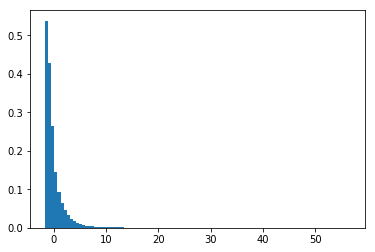

In [2]:
s = np.exp(np.random.normal(size=10000)) - np.exp(1/2.)
print("Mean of sample = {0}".format(np.mean(s)))
plt.hist(np.exp(np.random.normal(size=10000)) - np.exp(1/2.), bins=100, normed=True);

Let's now generate some data using the model

\begin{equation}
y = 0.3 + 2 x_1 + 5 x_2 + \epsilon
\end{equation}

and run linear regression:

In [3]:
m = 100
n = 2
betas = np.array([0.3, 2, 5])
X = np.column_stack([np.ones(m), np.random.uniform(size=(m, n))])
y = X.dot(betas) + np.exp(np.random.normal(size=m)) - np.exp(1/2.)

model = regression.linear_model.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     44.29
Date:                Sun, 10 Mar 2019   Prob (F-statistic):           2.16e-14
Time:                        16:05:24   Log-Likelihood:                -203.29
No. Observations:                 100   AIC:                             412.6
Df Residuals:                      97   BIC:                             420.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2944      0.446      0.661      0.510      -0.590       1.179
x1             1.7967      0.713      2.519      0.013       0.381       3.212
x2             5.2384      0.615      8.522      0.000       4.018       6.458
==============================================================================
Omnibus:                       88.300   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              642.696
Skew:                           3.005   Prob(JB):                    2.76e-140
Kurtosis:                      13.869   Cond. No.                         5.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see that p-value associated with the Jarque-Bera test is extremely small, since the errors are coming from a highly skewed distribution. We can also see this by plotting the histogram of residuals:

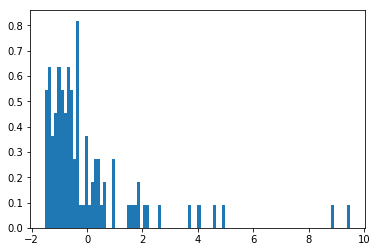

In [4]:
plt.hist(model.resid, bins=100, normed=True);

Let's compute the distribution of $t_j$ empirically and compare it to the t-distribution with $m-3$ degrees of freedom:

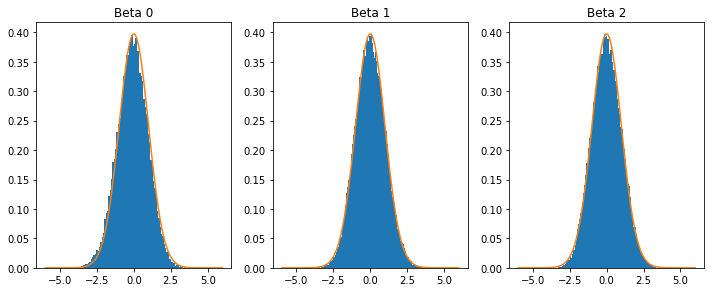

In [5]:
def empirical_t(X_):
    (m_, _) = X_.shape

    # Quantities that will not change during the simulation
    D = np.linalg.inv(X_.T.dot(X_))
    A = D.dot(X_.T)

    # Number of times to compute t values
    trials = 50000
    tvals = np.zeros((trials, n + 1))

    for i in range(50000):
        # Simulate noise
        noise = np.exp(np.random.normal(size=m_)) - np.exp(1/2.)
        # Compute y
        y_ = X_.dot(betas) + noise
        # OLS estimator
        betas_ = A.dot(y_)
        # Residuals
        e_ = y_ - X_.dot(betas_)
        # Standard error of estimates
        se = np.sqrt(1.0/(m_ - 2) * np.dot(e_, e_) * np.diag(D))
        # t values
        tvals[i,:] = (betas_ - betas) / se

    # Plot results
    tx = np.linspace(-6, 6, 100)

    fig, axes = plt.subplots(1, 3)
    fig.set_size_inches(10, 4)
    fig.tight_layout()

    for i in range(n + 1):
        axes[i].hist(tvals[:, i], bins=100, normed=True);
        axes[i].plot(tx, stats.t.pdf(tx, m_ - n - 1))
        axes[i].set_title("Beta {0}".format(i))

empirical_t(X)

This isn't bad at all! Even though the noise we're using is very skewed, the resulting $t$-values for $\hat{\beta}_j$ are very-well approximated by the $t$-distribution. Let's now try the same experiment but with $m=20$:

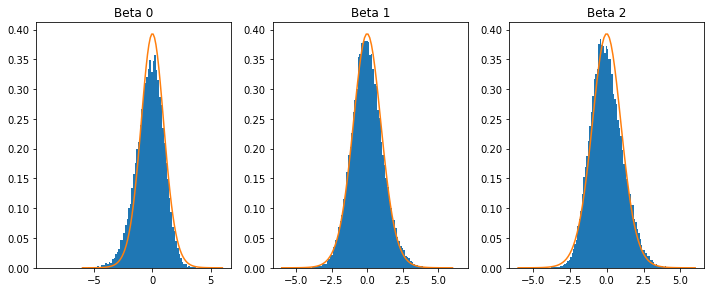

In [6]:
empirical_t(X[:20, :])

Now we start to see deviations from the t-distribution. This analysis has been comforting though. It seems like if we have enough data points, the confidence intervals will still be reliable even if $\epsilon$ is non-normal.